# Hurricane Distribution

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import xarray as xr
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC

plot_defaults()

In [3]:
from src.data_loading.ibtracs import gom_tcs

In [4]:
gtcs = gom_tcs()

[35, -100, 15, -80]
'filter_by_bbox'  7.64874 s 



In [5]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 465, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'CS' b'CS' b'CS' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [6]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 465, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 47.0 101.0 37.0 18.0 ... 29.0 70.0 63.0
    sid               (storm) |S13 b'1990216N13281' ... b'1903252N21288'
    season            (storm) float32 1.99e+03 1.935e+03 ... 2.008e+03 1.903e+03
    number            (storm) int16 60 46 5 44 10 53 39 ... 41 61 54 75 58 88 42
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'CS' b'CS' b'CS' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Occurance')

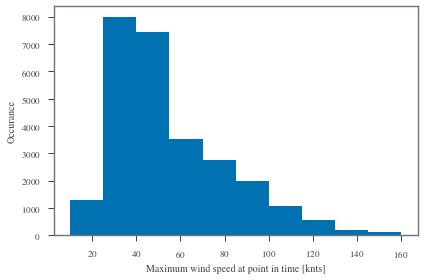

In [8]:
plt.hist(gtcs.usa_wind.values.ravel())
plt.xlabel("Maximum wind speed at point in time [knts]")
plt.ylabel("Occurance")

In [9]:
gtcs.usa_wind.values.shape

(465, 360)

Text(0, 0.5, 'Occurance')

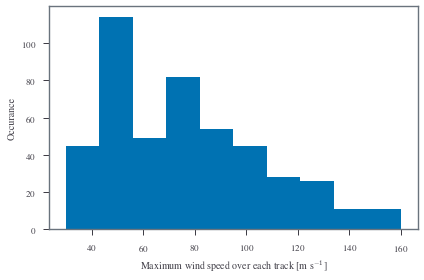

In [10]:
import numpy as np

plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))
plt.xlabel("Maximum wind speed over each track [m s$^{-1}$]")
plt.ylabel("Occurance")

Text(0, 0.5, 'Occurance')

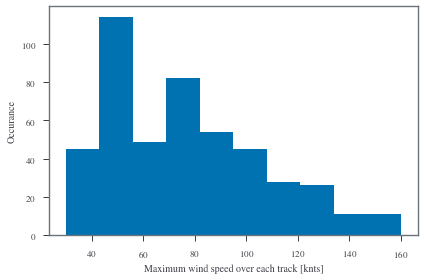

In [11]:
import numpy as np

plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))
plt.xlabel("Maximum wind speed over each track [knts]")
plt.ylabel("Occurance")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_46597/2010469386.py:3: RuntimeWarning: All-NaN slice encountered
  plt.hist(np.nanmin(gtcs.usa_pres.values, axis=1))


Text(0, 0.5, 'Occurance')

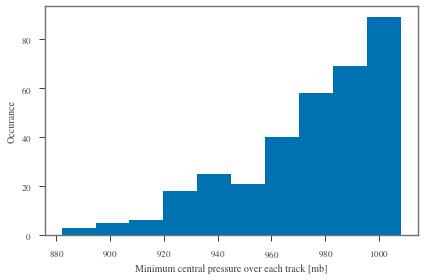

In [12]:
import numpy as np

plt.hist(np.nanmin(gtcs.usa_pres.values, axis=1))
plt.xlabel("Minimum central pressure over each track [mb]")
plt.ylabel("Occurance")

Text(0, 0.5, 'Occurance')

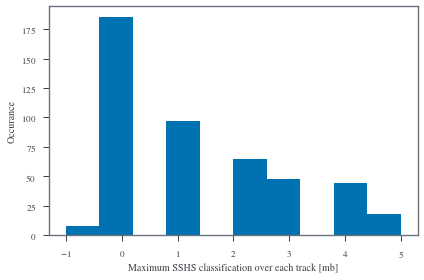

In [13]:
plt.hist(np.nanmax(gtcs.usa_sshs.values, axis=1))
plt.xlabel("Maximum SSHS classification over each track [mb]")
plt.ylabel("Occurance")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_46597/1773748188.py:2: RuntimeWarning: All-NaN slice encountered
  np.nanmin(gtcs.usa_pres.values, axis=1),


Text(0.5, 0, 'Minimum Central Pressure over track [mb]')

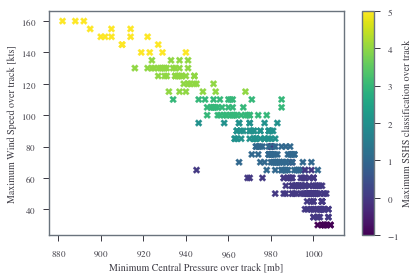

In [14]:
plt.scatter(
    np.nanmin(gtcs.usa_pres.values, axis=1),
    np.nanmax(gtcs.usa_wind.values, axis=1),
    c=np.nanmax(gtcs.usa_sshs.values, axis=1),
)
plt.colorbar(label="Maximum SSHS classification over track")
plt.ylabel("Maximum Wind Speed over track [kts]")
plt.xlabel("Minimum Central Pressure over track [mb]")

In [15]:
np.nanmax(gtcs.usa_sshs.values, axis=1).shape

(465,)

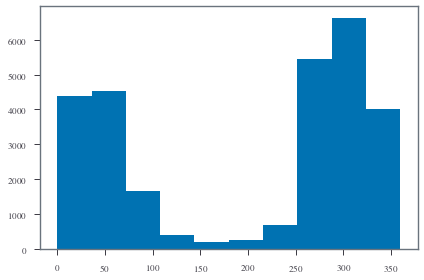

In [16]:
output = plt.hist(gtcs.storm_dir.values.ravel())

In [17]:
output = plt.hist(gtcs.storm_dir.values.ravel())
plt.clf()
points = output[0]
rads = output[1] / 2 / np.pi

<Figure size 432x288 with 0 Axes>

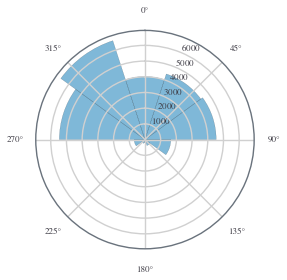

In [18]:
import numpy as np
import matplotlib.pyplot as plt

output = plt.hist(gtcs.storm_dir.values.ravel())
points = output[0]
rads = output[1] / 360 * 2 * np.pi
plt.clf()
ax = plt.subplot(projection="polar")
ax.bar(
    rads[1:],
    points,
    width=2 * np.pi / len(points),
    bottom=0.0,
    alpha=0.5,
    edgecolor="black",
)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

In [19]:
rads.shape

(11,)

In [20]:
points.shape

(10,)

In [21]:
points

array([4396., 4537., 1646.,  398.,  195.,  249.,  688., 5453., 6623.,
       4016.])

In [22]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 465, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 47.0 101.0 37.0 18.0 ... 29.0 70.0 63.0
    sid               (storm) |S13 b'1990216N13281' ... b'1903252N21288'
    season            (storm) float32 1.99e+03 1.935e+03 ... 2.008e+03 1.903e+03
    number            (storm) int16 60 46 5 44 10 53 39 ... 41 61 54 75 58 88 42
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'CS' b'CS' b'CS' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 297.0 299.0 305.0 ... nan nan
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_46597/2664581334.py:2: RuntimeWarning: All-NaN slice encountered
  np.nanmin(gtcs.cma_pres.values, axis=1),
/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_46597/2664581334.py:3: RuntimeWarning: All-NaN slice encountered
  np.nanmax(gtcs.cma_wind.values, axis=1),
/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_46597/2664581334.py:4: RuntimeWarning: All-NaN slice encountered
  c=np.nanmax(gtcs.cma_cat.values, axis=1),


Text(0.5, 0, 'Minimum Central Pressure over track [mb]')

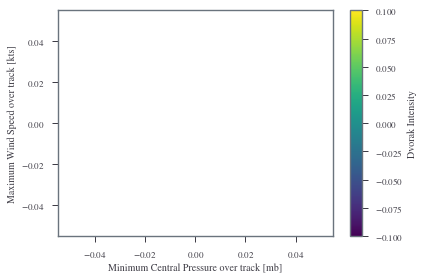

In [23]:
plt.scatter(
    np.nanmin(gtcs.cma_pres.values, axis=1),
    np.nanmax(gtcs.cma_wind.values, axis=1),
    c=np.nanmax(gtcs.cma_cat.values, axis=1),
)
plt.colorbar(label="Dvorak Intensity")
plt.ylabel("Maximum Wind Speed over track [kts]")
plt.xlabel("Minimum Central Pressure over track [mb]")

In [24]:
from src.data_loading.ibtracs import no_tcs

In [25]:
ntcs = no_tcs()

[30.8, -92, 28.5, -86.5]
'filter_by_bbox'  7.96618 s 



In [26]:
ntcs

<xarray.Dataset>
Dimensions:           (storm: 284, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'GM' b'GM' b'GM' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [27]:
from src.plot.ibtracs import plot_multiple_storms
import matplotlib.pyplot as plt
from src.constants import NO_BBOX

'plot_multiple_storms'  2.71206 s 



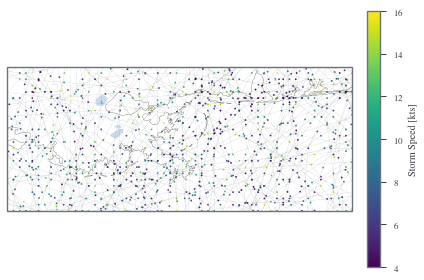

In [28]:
plot_multiple_storms(ntcs, scatter_size=9, bbox=NO_BBOX)

In [ ]:
plot_multiple_storms(ntcs, scatter_size=9, bbox=NO_BBOX)

In [33]:
np.unique(ntcs.name.values)

array([b'ABBY', b'ALBERTO', b'ALICIA', b'ALLISON', b'ANDREA', b'ANDREW',
       b'ARLENE', b'AUDREY', b'BAKER', b'BARBARA', b'BARRY', b'BECKY',
       b'BERTHA', b'BERYL', b'BETA', b'BETSY', b'BILL', b'BONNIE',
       b'BRENDA', b'CAMILLE', b'CANDY', b'CARLA', b'CELIA', b'CHANTAL',
       b'CINDY', b'CLAUDETTE', b'COLIN', b'CRISTOBAL', b'DANNY', b'DEAN',
       b'DEBBIE', b'DEBBY', b'DEBRA', b'DELTA', b'DENNIS', b'DOLLY',
       b'EARL', b'EASY', b'EDOUARD', b'ELENA', b'ERIN', b'ESTHER', b'ETA',
       b'ETHEL', b'FAY', b'FELICE', b'FLORENCE', b'FLOSSY', b'GEORGES',
       b'GERDA', b'GILBERT', b'GORDON', b'GUSTAV', b'HANNA', b'HARVEY',
       b'HELENE', b'HENRI', b'HERMINE', b'HILDA', b'HOW', b'HUMBERTO',
       b'IDA', b'IKE', b'IRENE', b'IRMA', b'ISAAC', b'ISIDORE', b'IVAN',
       b'JOSEPHINE', b'JUAN', b'KATE', b'KATRINA', b'KEITH', b'LAURA',
       b'LEE', b'LILI', b'LOVE', b'MATTHEW', b'MICHAEL', b'MINDY',
       b'MITCH', b'NATE', b'NICHOLAS', b'NOT_NAMED', b'OPAL', b'RITA',
  

In [37]:
from src.data_loading.ibtracs import katrina

katrina()

AxisError: axis 1 is out of bounds for array of dimension 1

In [39]:
ntcs["name"].shape

(284,)

In [43]:
len(ntcs["name"].values.shape)

1